# KNN 

Implementation of the KNN algorithm with the Spotify dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import pandas as pd
%matplotlib inline

# visualization library
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24})   

# change the theme
!jt -t gruvboxd -T

In [2]:
df = pd.read_csv (r'C:\Users\Emelie\Documents\Modern method in ML\Project\project_train.csv')
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Label
0,0.545,0.884,5,-4.807,0,0.367,0.290000,0.000000,0.370,0.641,86.049,1
1,0.795,0.545,7,-8.153,1,0.343,0.003960,0.000000,0.273,0.809,91.967,1
2,0.489,0.871,5,-5.825,1,0.386,0.002850,0.000004,0.130,0.341,117.431,1
3,0.539,0.931,4,-1.803,0,0.262,0.000713,0.000000,0.204,0.685,85.571,0
4,0.918,0.734,11,-2.832,0,0.269,0.029400,0.000008,0.191,0.608,97.044,1


## Analysis of the dataset 

In [3]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Label
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000
mean,0.531927,2.151416,5.130435,-22.380968,0.664596,0.105569,0.316788,0.190513,0.215020,0.474892,114.005286,0.501035
std,0.189464,33.370758,3.668522,297.355888,0.472621,0.114718,0.374649,0.348469,0.202702,0.269956,27.146241,0.500517
min,0.084900,0.009790,0.000000,-6542.000000,0.000000,0.022600,0.000024,0.000000,0.022400,0.024200,44.777000,0.000000
25%,0.365000,0.422000,1.000000,-9.813500,0.000000,0.036300,0.018550,0.000000,0.093600,0.235500,92.717500,0.000000
50%,0.553000,0.734000,5.000000,-5.802000,1.000000,0.046700,0.114000,0.000041,0.135000,0.475000,113.122000,1.000000
75%,0.686000,0.876500,8.000000,-4.358500,1.000000,0.141500,0.608500,0.093000,0.271500,0.703000,130.009500,1.000000
max,0.940000,734.000000,11.000000,4.331000,1.000000,0.925000,0.996000,0.994000,0.992000,0.969000,210.752000,1.000000


##### Histogram 
Histogram over the different attributes

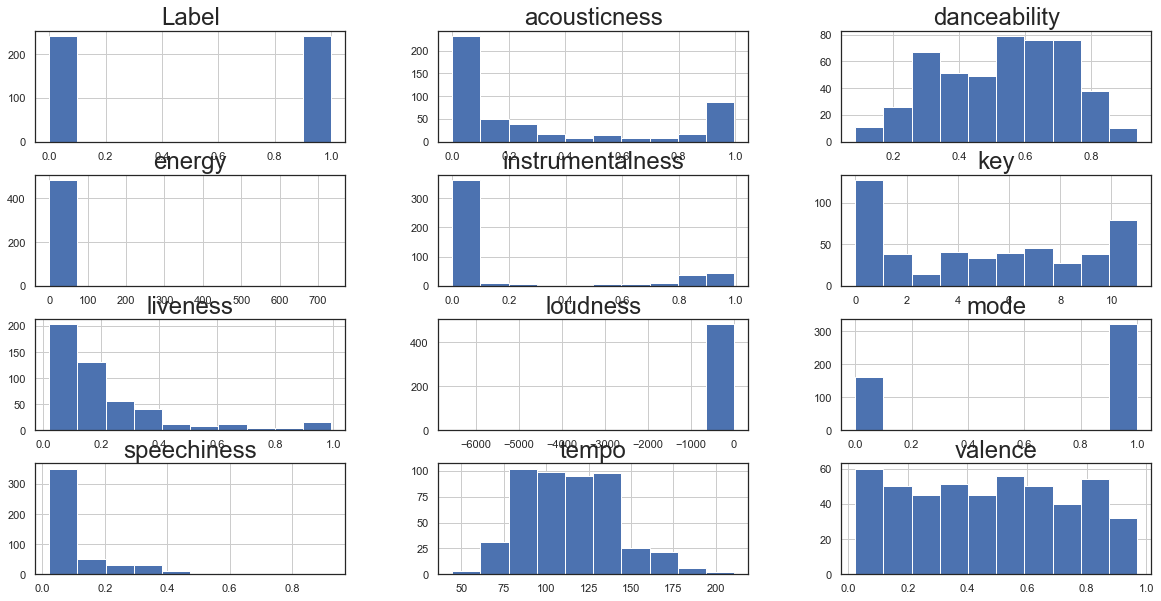

In [10]:
hist = df.hist(figsize=(20,10),bins=10)

#### Outliers
Analys the data with boxplot to find outliers adn search the amount in % how many there are

In [7]:
outliers_percentage = []
variables = []
for k, v in df.items():
    Q1 = v.quantile(0.25)
    Q3 = v.quantile(0.75)
    IRQ = Q3 - Q1
    v_col = v[(v <= Q1 - 1.5 * IRQ) | (v >= Q3 + 1.5 * IRQ)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    outliers_percentage.append(perc)
    variables.append(k)
#     print("Column %s outliers = %.2f%%" % (k, perc))

outliers = pd.DataFrame({'Variable':variables, '% Outliers':outliers_percentage })
outliers.sort_values(by=["% Outliers"],ascending=False)

,Variable,% Outliers
7,instrumentalness,22.981366
3,loudness,15.320911
5,speechiness,9.523810
8,liveness,8.488613
10,tempo,0.621118
1,energy,0.207039
0,danceability,0.000000
2,key,0.000000
4,mode,0.000000
6,acousticness,0.000000


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Label
94,0.578,0.817,0,-6542.0,1,0.0363,0.183,0.000003,0.285,0.726,141.621,1


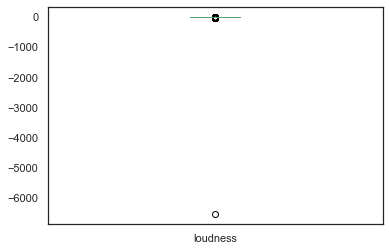

In [7]:
tempo_box = df['loudness']

tempo_box.plot.box()

minloud = tempo_box.min()

df[df.eq(minloud).any(1)]

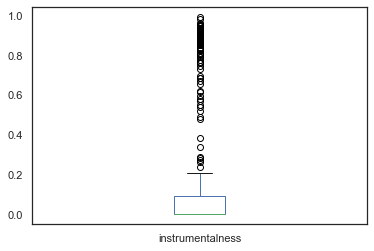

In [8]:
tempo_box = df['instrumentalness']

tempo_box.plot.box()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Label
84,0.705,734.0,1,-4.551,0,0.0775,0.285,0.0,0.048,0.963,157.992,1


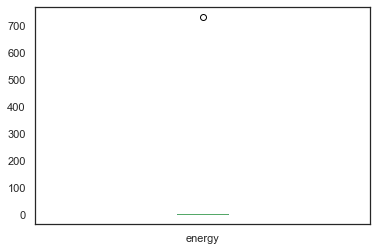

In [10]:
tempo_box = df['energy']
'speechiness'
tempo_box.plot.box()

maxspeech = tempo_box.max()

df[df.eq(maxspeech).any(1)]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Label
68,0.715,0.288,1,-13.843,1,0.925,0.785,0.0,0.688,0.772,115.114,0


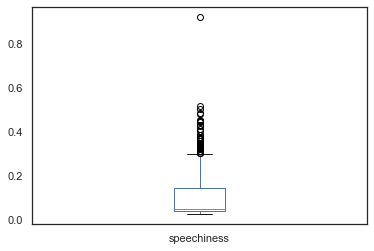

In [11]:
tempo_box = df['speechiness']

tempo_box.plot.box()

maxspeech = tempo_box.max()

df[df.eq(maxspeech).any(1)]

#### Correlation analysis 
This can give us a hint of what to expect from our models, for example Pierre should be in to acousticness and instrumentalness but dislike danceability. 

(12.5, -0.5)

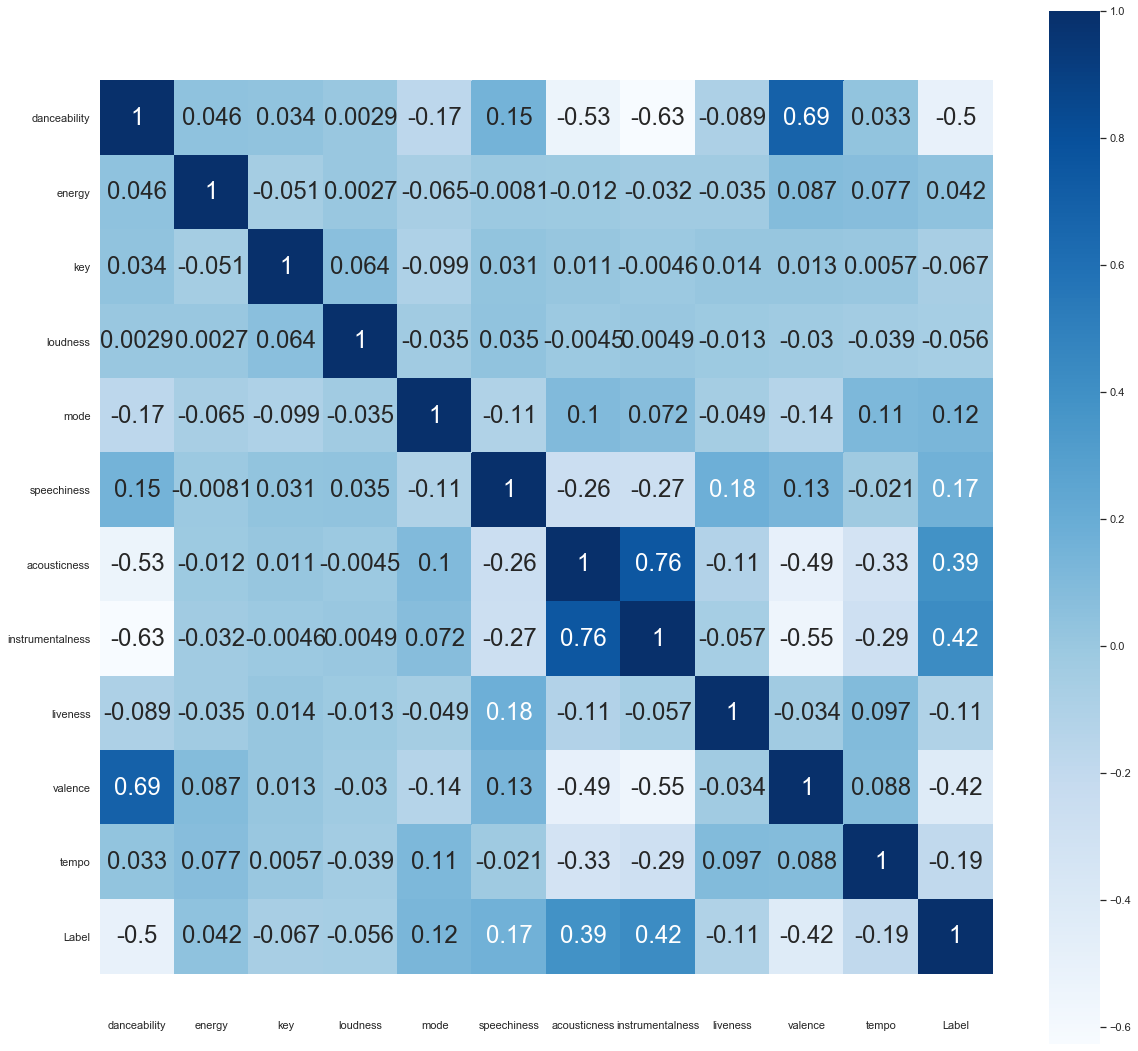

In [37]:
corrmat = df.corr()
plt.figure(figsize=(20,19))
sns.heatmap(corrmat, square=True, cmap="Blues",annot=True);

# these lines are here only to correct a matplotlib bug
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
#


#### Missing values 

In [38]:
df.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
Label               0
dtype: int64

## KNN algorithm 

Take away outliers 

In [150]:
df = df.drop([68,94,84], axis=0)
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Label
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,0.531451,2.158064,5.149688,-8.844417,0.663202,0.104009,0.316093,0.191305,0.213891,0.473753,113.945568,0.501040
std,0.189662,33.440044,3.663793,7.224057,0.473107,0.108645,0.374770,0.348977,0.201945,0.269932,27.173405,0.500519
min,0.084900,0.009790,0.000000,-36.252000,0.000000,0.022600,0.000024,0.000000,0.022400,0.024200,44.777000,0.000000
25%,0.365000,0.427000,1.000000,-9.700000,0.000000,0.036300,0.018500,0.000000,0.093400,0.235000,92.706000,0.000000
50%,0.551000,0.734000,5.000000,-5.795000,1.000000,0.046700,0.113000,0.000043,0.135000,0.474000,113.012000,1.000000
75%,0.686000,0.877000,8.000000,-4.353000,1.000000,0.141000,0.599000,0.100000,0.267000,0.699000,130.008000,1.000000
max,0.940000,734.000000,11.000000,4.331000,1.000000,0.517000,0.996000,0.994000,0.992000,0.969000,210.752000,1.000000


In [7]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 11].values

# we split the training data into validation and training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### Calculate KNN with only KNeighborsClassifier
We will now scale our data with StandardScaler which uses $ (x- \mu )/\sigma $, where $\sigma$ is the standard deviation and $\mu$ is the expected value 

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) # scale against train data

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


We know use the package KNeighborsClassifier from sklearn to classifier our training data. OBS: In this line of code we need to change n! 


In [17]:
from sklearn.neighbors import KNeighborsClassifier
n = 3
classifier = KNeighborsClassifier(n_neighbors=n)
classifier.fit(X_train, y_train)

# prediction 
y_pred = classifier.predict(X_test)

#### Evaluate the algorithm 

We will now see how good it performed from sklearn.metrics import classification_report, 

In [154]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[46  4]
 [11 36]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86        50
           1       0.90      0.77      0.83        47

    accuracy                           0.85        97
   macro avg       0.85      0.84      0.84        97
weighted avg       0.85      0.85      0.84        97



### Calculate KNN with help of cross validation 

In [27]:
# gives us the accuracy for the different splits and then print the mean of the accuracy
X_scaled = scaler.transform(X)
scores = cross_val_score(classifier, X_scaled, y, cv=KFold(n_splits=100, random_state=1234, shuffle=True), scoring = 'accuracy')
print(np.mean(scores))
print(np.var(scores))

0.8119999999999998
0.038855999999999995


### Finding best K and weights with help off gridsearch

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': list(range(3,30)),'weights' : ['uniform','distance']}
search = GridSearchCV(classifier, param_grid, cv=100,scoring='accuracy')
X_scaled = scaler.transform(X)
search.fit(X_scaled,y)
print(search.best_score_)
print(search.best_params_)


0.825
{'n_neighbors': 3, 'weights': 'distance'}


#### Find out the best n with a loop


In [14]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    

Text(0, 0.5, 'Mean Error')

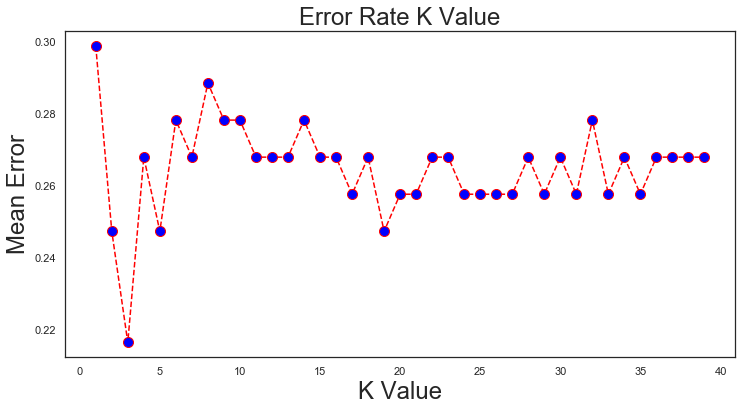

In [15]:
# figure for the best n 

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')